In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [119]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9300699300699301


In [120]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9953051643192489
0.951048951048951


[Text(0.5657894736842105, 0.9, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]\nclass = B'),
 Text(0.34210526315789475, 0.7, 'worst radius <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]\nclass = B'),
 Text(0.21052631578947367, 0.5, 'radius error <= 0.626\ngini = 0.039\nsamples = 249\nvalue = [5, 244]\nclass = B'),
 Text(0.10526315789473684, 0.3, 'worst smoothness <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]\nclass = B'),
 Text(0.05263157894736842, 0.1, 'gini = 0.016\nsamples = 245\nvalue = [2, 243]\nclass = B'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = A'),
 Text(0.3157894736842105, 0.3, 'symmetry error <= 0.025\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = A'),
 Text(0.2631578947368421, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = A'),
 Text(0.3684210526315789, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.47368421052631576, 0.5, 'worst texture <= 19.91\ng

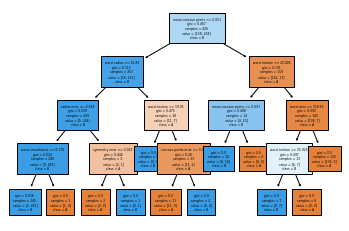

In [57]:
from sklearn.tree import plot_tree

plot_tree(tree,  class_names=['A','B'], filled=True, fontsize=3, feature_names=cancer.feature_names)


In [58]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


Text(0, 0.5, 'Price')

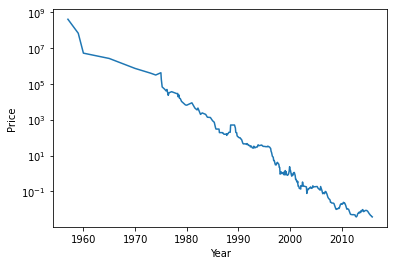

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
ram_price=pd.read_csv('sample_data/ram_price.csv')
plt.semilogy(ram_price.date, ram_price.price)
plt.yticks(fontname='Arial')
plt.xlabel('Year')
plt.ylabel('Price')

In [67]:
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [147]:
from sklearn.tree import DecisionTreeClassifier
data_train  = ram_price[ram_price.date < 2000] 
data_test  = ram_price[ram_price.date > 2000]

In [148]:
type(data_train.date)

pandas.core.series.Series

In [149]:
import numpy as  np

In [150]:
from sklearn.tree import DecisionTreeClassifier

data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

In [151]:
X_train = data_train.date.to_numpy()[:,np.newaxis]

In [152]:
y_train = np.log(data_train.price)

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [154]:
X_all = ram_price.date.to_numpy()[:,np.newaxis]

In [156]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [167]:
price_tree = np.exp(pred_tree) # 기존값으로 되돌리기
price_lr = np.exp(pred_lr)

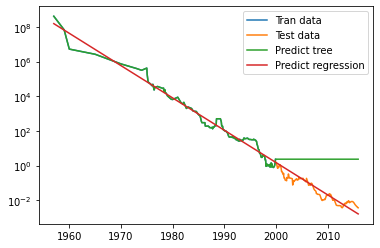

In [172]:
plt.semilogy(data_train.date,data_train.price, label='Tran data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_price.date,price_tree, label ='Predict tree')
plt.semilogy(ram_price.date,price_lr, label = 'Predict regression')
plt.legend()

In [176]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [181]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [192]:
#!pip install mglearn

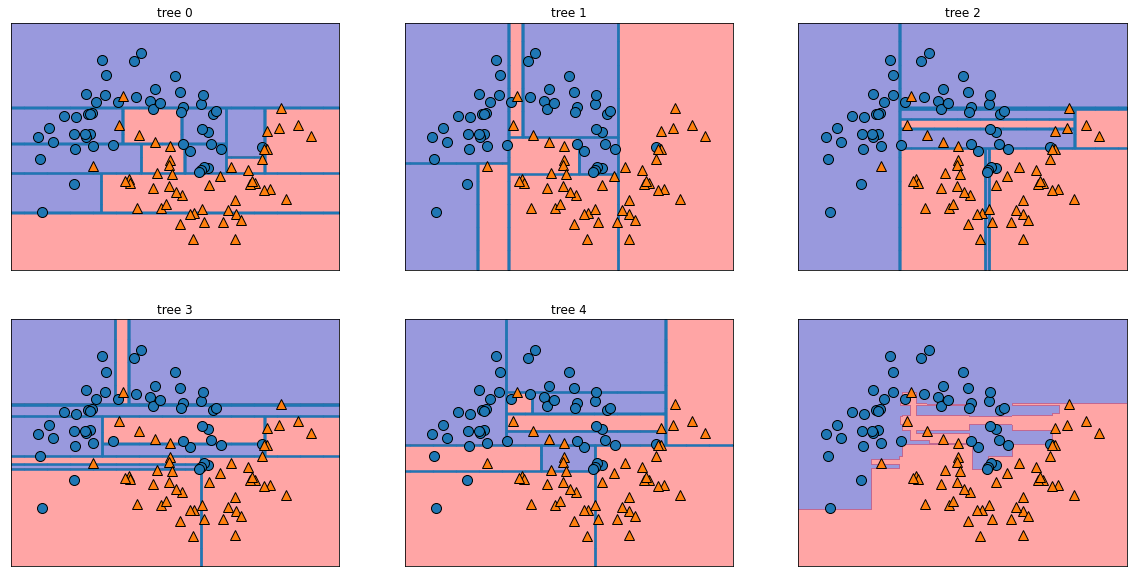

In [201]:
import mglearn
fig, axes = plt.subplots(2,3, figsize=(20,10))
# enumerate 열거형으로 만들어주는 함수 (반복가능한 자료형)
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title('tree {}'.format(i))
  mglearn.plots.plot_tree_partition(X,y,tree, ax=ax)
  
mglearn.plots.plot_2d_separator(forest,X,fill=True, ax=axes[-1,-1],alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1], y)


In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [207]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

1.0
0.972027972027972


In [210]:
from sklearn.ensemble import GradientBoostingClassifier

In [211]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

In [214]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [216]:
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

1.0
0.965034965034965


In [223]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
#GradientBoostingClassifier(random_state=0,max_depth=1) depth 5단계로 줘도 충분한 결과가 나오고 학습이 잘되면 단계 낮춰야함
gbrt.fit(X_train,y_train)
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9906103286384976
0.972027972027972


In [225]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)
gbrt.fit(X_train,y_train)
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

1.0
0.965034965034965


Text(0.5, 0, 'feature 1')

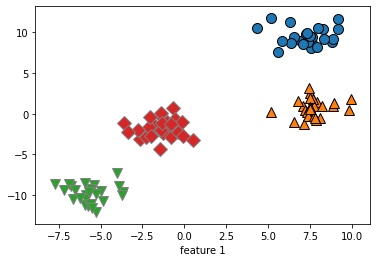

In [228]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.xlabel('feature 1')

Text(0, 0.5, 'feature 1')

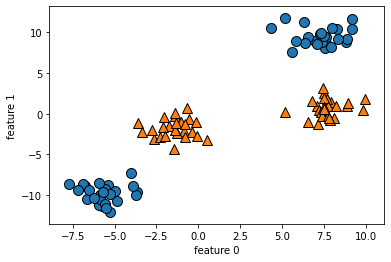

In [230]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [231]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])